In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv(r'Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
#Checking missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
# Extract features, target
X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
y = df[["Chance of Admit "]].values

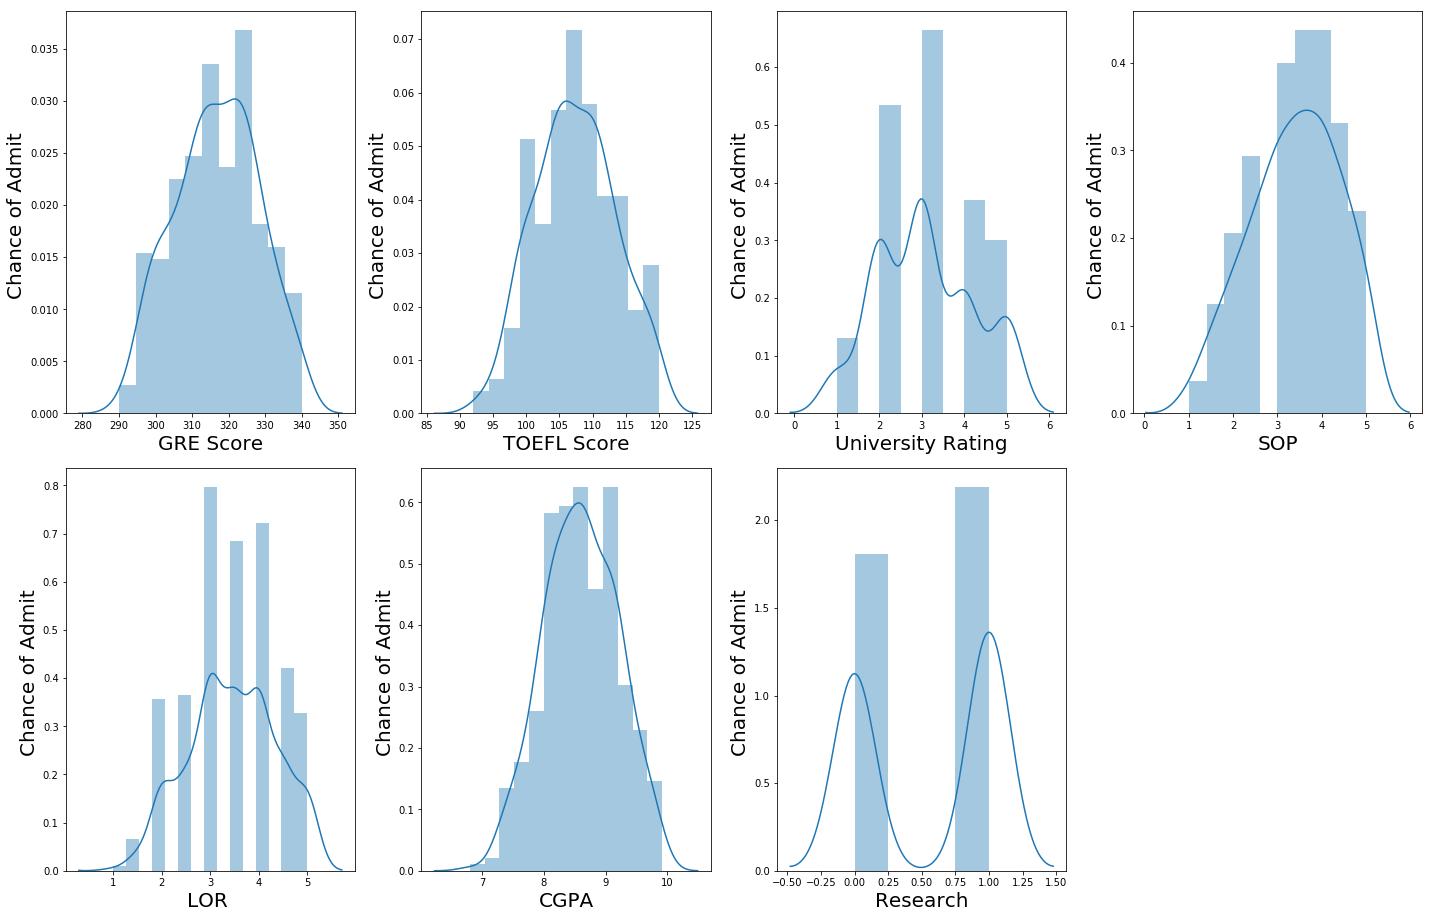

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit ',fontsize=20)
    plotnumber+=1
plt.tight_layout()

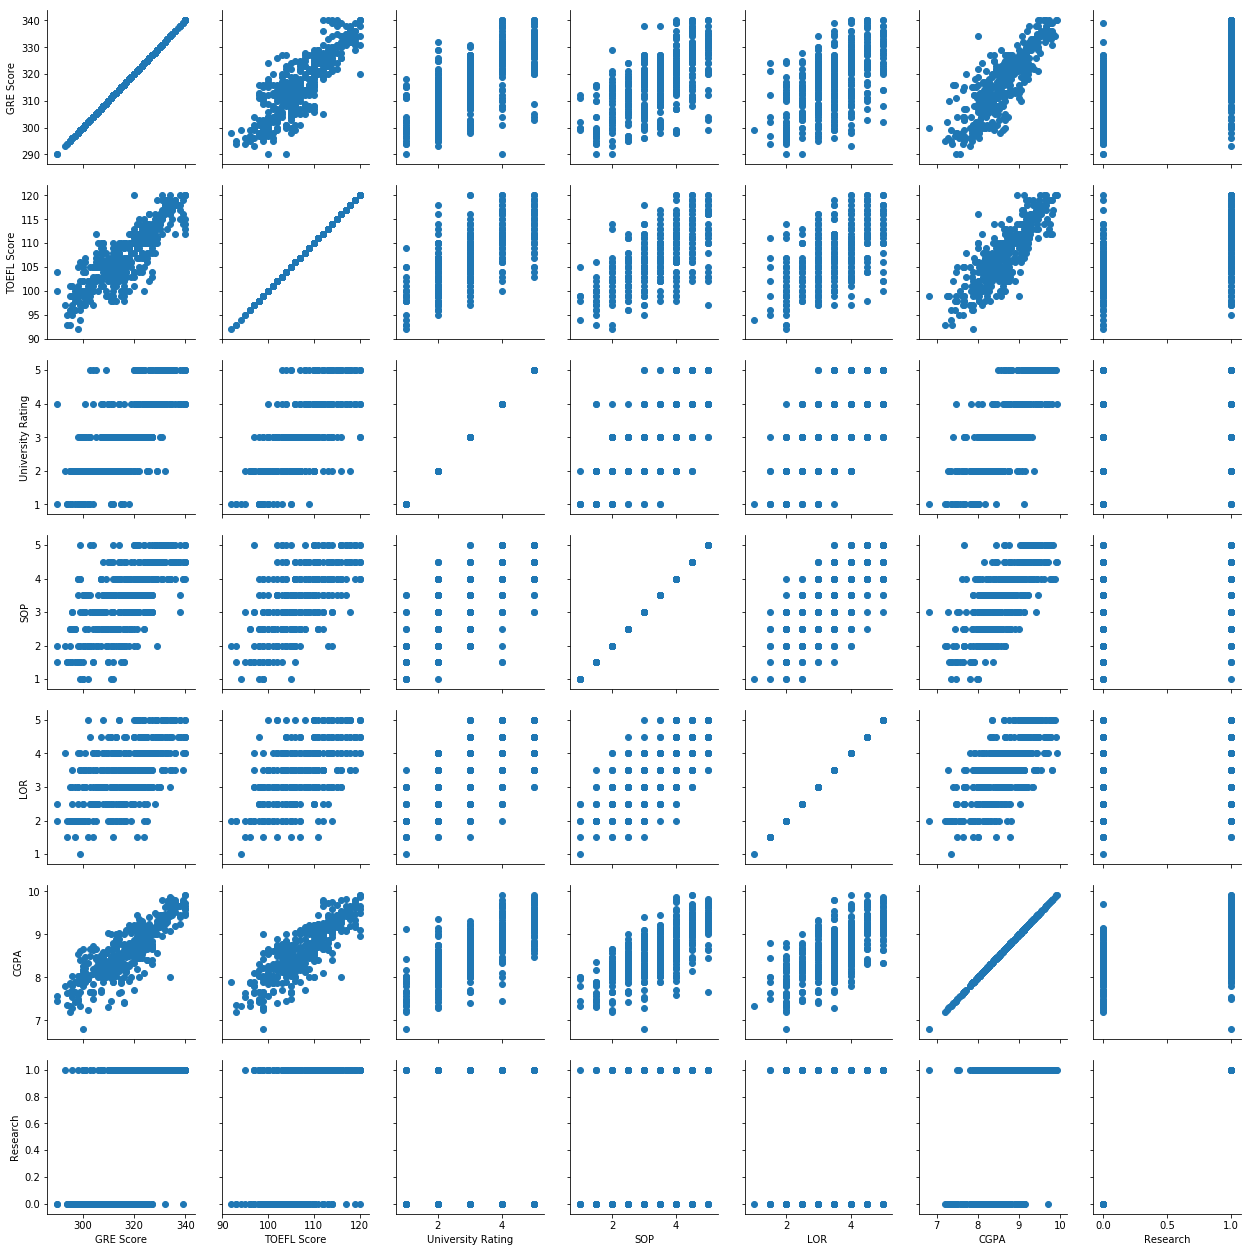

In [7]:
#Pair plot data visualization
import seaborn as sns
g = sns.PairGrid(X)
g.map(plt.scatter)

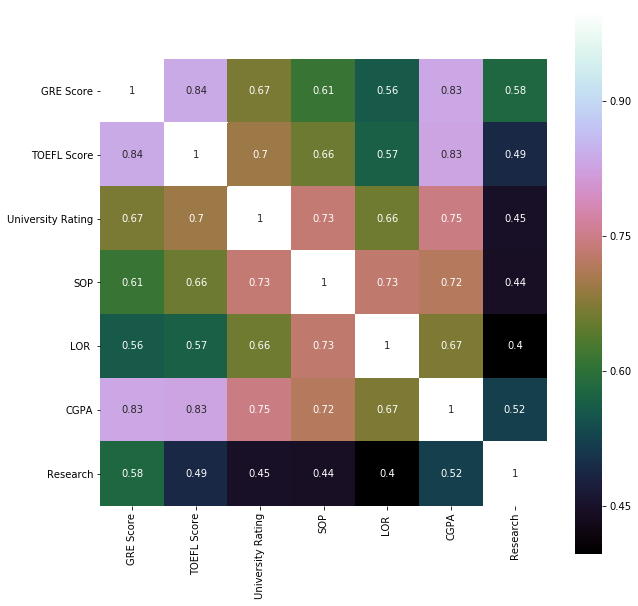

In [8]:
# Correlation heatmap
correlation = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [9]:
#Standard Scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [10]:
X_sc

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_sc
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,4.615516,GRE Score
1,4.288959,TOEFL Score
2,2.919606,University Rating
3,3.075504,SOP
4,2.431258,LOR
5,5.207403,CGPA
6,1.543312,Research


In [12]:
#Spliting the data
x_train,x_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.30,random_state=100)

In [13]:
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (280, 7)
y_train:  (280, 1)
x_test:  (120, 7)
y_test:  (120, 1)


In [14]:
# instantiate Linear Regression
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [15]:
#fit the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#y_prediction_Values
y_pred_lr=lr.predict(x_test)

In [17]:
#train score
print('LR_train_score: ',lr.score(x_train,y_train))
print('LR_test_score: ',lr.score(x_test, y_test))

LR_train_score:  0.8018709736506442
LR_test_score:  0.8003159611553716


In [18]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred_lr)
print('Mean Squared value is ',MSE)
RMSE=np.sqrt(MSE)
print('Root Mean Squared value is ',RMSE)

Mean Squared value is  0.003716513784197367
Root Mean Squared value is  0.06096321664903655


In [19]:
#checking R2 Score
r2_res=r2_score(y_test,y_pred_lr)
print('Linear Regression model R2_score is: ',r2_res)

Linear Regression model R2_score is:  0.8003159611553716


# Lasso Regularization

In [20]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV

lassocv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [21]:
# best alpha parameter
alpha = lassocv.alpha_
alpha

0.00016289192173320988

In [22]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00016289192173320988, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
ypred_lasso=lasso_reg.predict(x_test)

In [24]:
print('Lasso Regularization train_Score: ',lasso_reg.score(x_train, y_train))
print('Lasso Regularization test_Score: ',lasso_reg.score(x_test, y_test))

Lasso Regularization train_Score:  0.8018546383024671
Lasso Regularization test_Score:  0.8011332700113092


In [25]:
from sklearn.metrics import mean_squared_error
lasso_MSE = mean_squared_error(y_test,ypred_lasso)
print('Mean Squared value is ',lasso_MSE)
lasso_RMSE=np.sqrt(lasso_MSE)
print('Root Mean Squared value is ',lasso_RMSE)

Mean Squared value is  0.0037013020544736804
Root Mean Squared value is  0.06083832718339386


In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import adjusted_rand_score
lasso_r2=r2_score(y_test,ypred_lasso)
print('R2 Square for Lasso: ',lasso_r2)

R2 Square for Lasso:  0.8011332700113092


# Ridge Regularization

In [27]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([8.53008209, 9.04096851, 1.63089222, 7.08457966, 3.87378433,
       6.34605768, 9.80705424, 4.11064831, 8.18054129, 8.33816891,
       9.07416536, 5.54443117, 4.70044546, 1.61275368, 1.68804496,
       0.40992834, 4.23085223, 4.20781306, 7.30316502, 6.31342837,
       9.75528185, 0.54415406, 6.02237538, 2.62391117, 3.83470166,
       5.4131556 , 1.92078044, 3.4782099 , 7.76717839, 1.32243707,
       6.45478129, 6.10345541, 9.76478777, 1.25537244, 0.18668214,
       8.78488544, 5.74651925, 1.69844971, 4.74788132, 2.57281821,
       2.00091571, 0.21444065, 4.10146892, 6.11089654, 6.85350742,
       5.201056  , 7.37920211, 8.02483453, 8.87174739, 9.64504755]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [28]:
#finding the best alpha value
ridgecv.alpha_

0.18668214156503438

In [29]:
#ridge mode initilazation 
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.18668214156503438, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
y_pred_ridge=ridge_model.predict(x_test)

In [31]:
print('Ridge Regularization train_Score: ',lasso_reg.score(x_train, y_train))
print('Ridge Regularization test_Score: ',lasso_reg.score(x_test, y_test))

Ridge Regularization train_Score:  0.8018546383024671
Ridge Regularization test_Score:  0.8011332700113092


In [32]:
from sklearn.metrics import mean_squared_error
ridge_MSE = mean_squared_error(y_test,y_pred_ridge)
print('Ridge Mean Squared value is ',ridge_MSE)
ridge_RMSE=np.sqrt(ridge_MSE)
print('Ridge Root Mean Squared value is ',ridge_RMSE)

Ridge Mean Squared value is  0.00371379682321347
Ridge Root Mean Squared value is  0.060940928965790064


In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import adjusted_rand_score
ridge_r2_res=r2_score(y_test,y_pred_ridge)
print('R2 Square for Lasso: ',ridge_r2_res)

R2 Square for Lasso:  0.8004619403644235


# Save the model

In [46]:
import pickle

#save model
pickle.dump(lasso_reg,open('C://Users//arjun//Machine Learning//Admission_Predict_LR_GCP//admission.pickle','wb'))

#load the model
admission_model = pickle.load(open('C://Users//arjun//Machine Learning//Admission_Predict_LR_GCP//admission.pickle','rb'))

#predict the model
y_pred=admission_model.predict(x_test)

In [52]:
admission_model.predict([[325,106,3,3.5,4,8.4,1]])

array([8.18413509])

In [55]:
admission_model.predict([[321,109,3,3,4,8.2,1]])


array([8.17837532])

In [57]:
admission_model.predict([[295,93,1,2,2,7.2,0]])


array([7.34582261])